# 2.3 데이터 가져오기

## 2.3.2 데이터 다운로드

In [8]:
# PATH 추가하는 코드
# .bashrc에 직접 추가하려고 해도 잘 안 됨
import os
os.environ['PATH'] += ":/usr/scr"
os.environ['PATH'].split(":")

['/opt/bin',
 '/usr/local/nvidia/bin',
 '/usr/local/cuda/bin',
 '/usr/local/sbin',
 '/usr/local/bin',
 '/usr/sbin',
 '/usr/bin',
 '/sbin',
 '/bin',
 '/tools/node/bin',
 '/tools/google-cloud-sdk/bin',
 '/usr/scr',
 '/usr/scr']

In [9]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "http://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# 데이터 다운로드하고 파일 압축을 푸는 함수
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [10]:
# 데이터 읽어 들이는 함수
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## 2.3.3 데이터 구조 훑어보기

In [11]:
fetch_housing_data()
housing = load_housing_data()
# 데이터의 처음 5행만 보기
housing.head()

AttributeError: ignored

In [112]:
# 데이터에 대한 간략한 설명과 전체 행 수
# 각 특성의 데이터 타입과 널이 아닌 값의 개수를 확인하는데 유용
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [113]:
# 해당 특성(속성)의 특정 값들에 대한 샘플의 수를 알려준다.
# 연속적 값이나 이산적인 값이나 상관없다
# 어차피 유한이라 다 보여줄 수 있다.
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [114]:
# 숫자형 특성의 요약 정보를 보여준다
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


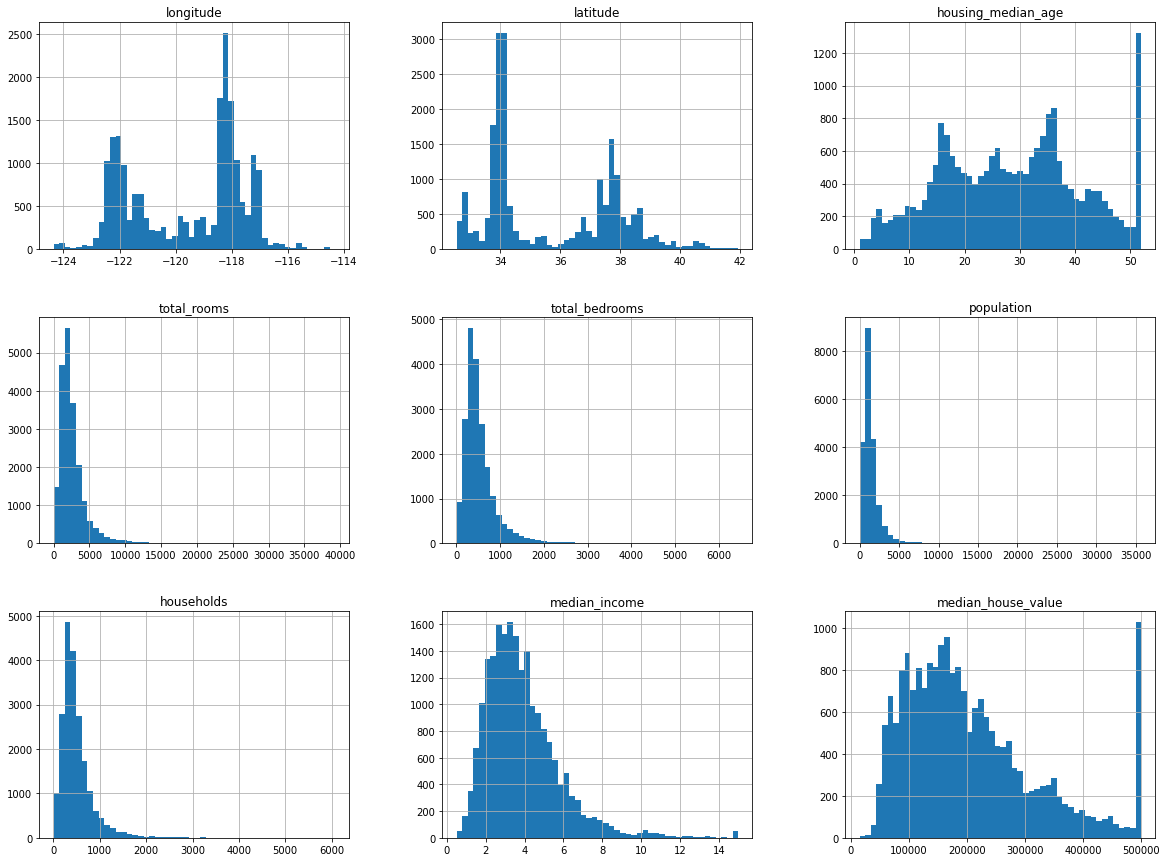

In [115]:
# 아래의 매직 명령으로 맷플롯립이 주피터 자체의 백엔드를 사용하도록 함.
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show() # 주피터 노트북이 자동으로 그려주므로 선택사항

## 2.3.4 테스트 세트 만들기

### 일정 크기의 데이터에서 일정 비율로 랜덤하게 데이터를 고르기

In [116]:
import numpy as np

def split_train_text(data, test_ratio):
    np.random.seed(42) # 랜덤한 패턴을 일정하게 해주는 시드
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# a, b = split_train_text(housing, 0.2)
# print(a)

### 업데이트 되는 데이터에 대해 기존의 테스트 데이터에 새로운 테스트 데이터를 추가하여 테스트 데이터 만들기

In [117]:
from zlib import crc32

# 식별자 값에 대한 해시 값이 최대 해시 값의 20% 미만이라면 True 이상이라면 False를 반환한다.
def test_set_check(identifier, test_ratio):
    # & 0xffffffff은 파이썬 2와의 호환성 때문에 넣음.
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [118]:
# True(최대 해시 값의 20% 미만)인 값은 test
# False(최대 해시 값의 20% 이상)인 값은 train이 된다.
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

#### 행의 인덱스를 식별자로 사용

In [119]:
# 새 행이 데이터셋 마지막에 추가되어야 하고 어떤 행도 삭제되지 않아야 함.
# 만약 그렇게 된다면 식별자라는 의미가 퇴색됨.

housing_with_id = housing.reset_index() # "index" 열이 추가된 데이터 프레임을 반환함.

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
# 전체 데이터 셋에서 테스트 데이터의 비율 출력)
print(test_set.size / (train_set.size + test_set.size))

0.2


#### 시간이 지나도 불변한 특성들로 식별자 만들기

In [120]:
# 그렇지 못한 경우 시간이 지나도 변하지 않는 안전한 특성으로 고유 식별자를 만듦.
# 위도와 경도의 합이 같은 곳이 많을 수 있지만 그래도 확률이 낮을 것 같다. 그리고 특성으로 식별자를 만들면 행(데이터)의 삽입, 삭제, 추가 등이 용이하다.
housing_with_id["id"] = housing["longitude"] + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
# 전체 데이터 셋에서 테스트 데이터의 비율 출력)
print(test_set.size / (train_set.size + test_set.size))

0.0007751937984496124


#### 계층적 샘플링으로 테스트 데이터 만들기

In [121]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

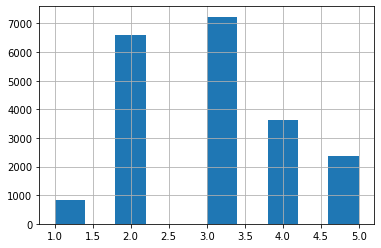

In [122]:
housing["income_cat"].hist()

In [123]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for문으로 적은 거 이거 오타인 것 같은데 잘 모르겠다.
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [124]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [125]:
# housing 이랑 strat_train_set, strat_test_set의 income_cat 특성 삭제
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
# 책에는 이거 삭제하는 거 없었지만 삭제해 봄
# 아마도 굳이 삭제해서 리소스를 사용하지 않으려고 하거나
# housing에는 income_cat 특성이 필요하기 때문에 삭제하지 않는 것 같긴 하다.
housing.drop("income_cat", axis=1, inplace=True)

# 2.4 데이터 이해를 위한 탐색과 시각화

## 2.4.1 지리적 데이터 시각화

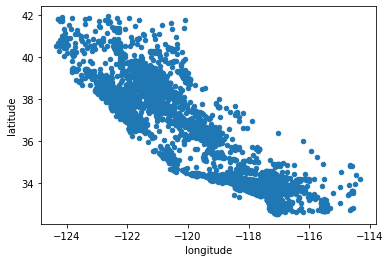

In [126]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

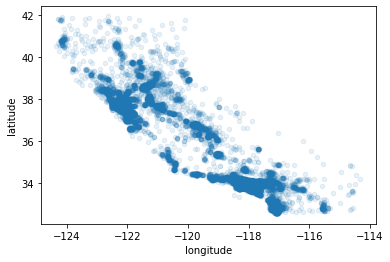

In [127]:
# 데이터의 패턴을 찾기 위해 alpha 속성을 이용해
# 데이터 밀집 정도를 알아봄.
# 아마도 alpha는 수채화의 묽기를 정하는 정도 같음.
# 예를 들어, alpha가 0.1(묽으면)이면 더 많이 붓칠을 해야 진해지고
# alpha가 0.9(진하면)이면 조금만 붓칠을 해도 진해진다.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

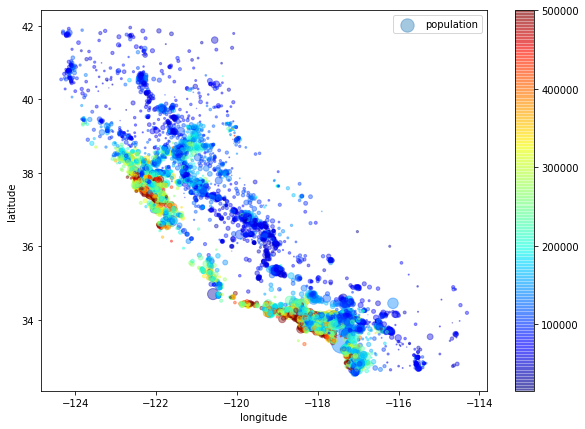

In [128]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c=housing["median_house_value"], cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False)
plt.legend()
plt.show()

## 2.4.2 상관관계 조사

In [129]:
# 0보다 클 때 1로 갈수록 더 강한 양의 상관관계를 가지고
# 0보다 작을 때 -1로 갈수록 더 강한 음의 상관관계를 가지고
# 0일 때 선형적인 상관관계는 없다.(상수함수 형태이거나 선형적이지 않은 데이터 분포 형태)
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

![%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-06-26%2019.28.31.png](attachment:%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-06-26%2019.28.31.png)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed3c5f4610>,
      dtype=object)

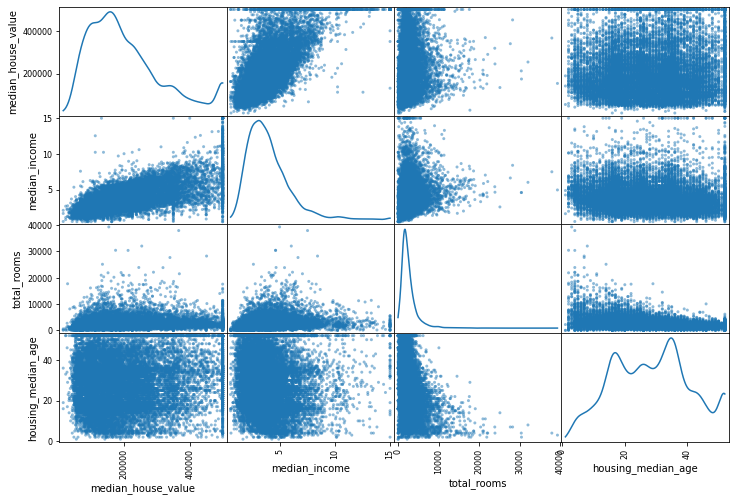

In [130]:
from pandas.plotting import scatter_matrix
import seaborn as sns

attributes = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8), diagonal="kde")

In [131]:
# seaborn으로 그리기
# sns.pairplot(housing[attributes], diag_kind="kde")

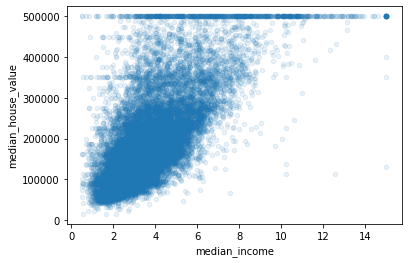

In [132]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
            alpha=0.1)

## 2.4.3 특성 조합으로 실험

In [133]:
# 기존의 특성에서 유용한 특성의 조합을 찾기
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [134]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# 2.5 머신러닝 알고리즘을 위한 데이터 준비

In [135]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop 메소드는 데이터의 copy를 만듦
housing_labels = strat_train_set["median_house_value"].copy()

## 2.5.1 데이터 정제

In [136]:
# housing.dropna(subset=["total_bedrooms"]) # 1. total_bedrooms 특성에 수가 아닌 값이 있는 행 삭제
# housing.drop("total_bedrooms", axis=1) # 2. total_bedrooms 특성 삭제, axis=1는 열 삭제를 말하는 듯
median = housing["total_bedrooms"].median() # 3. total_bedrooms 특성에 수가 아닌 값을 중간값으로 바꿈
housing["total_bedrooms"].fillna(median, inplace=True)

In [137]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # 누락된 값을 특성의 중간값으로 대체

In [138]:
housing_num = housing.drop("ocean_proximity", axis=1) # housing에서 텍스트 특성을 제외한 숫자 특성만 가지고 옴

In [139]:
imputer.fit(housing_num)
print(imputer.statistics_) # imputer로 계산한 housing_num에 대한 각 특성의 중간 값
print(housing_num.median().values) # 메소드로 계산한 housing_num에 대한 각 특성의 중간 값

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [140]:
X = imputer.transform(housing_num) # 넘파이 배열
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing_num.index) # 넘파이 배열을 판다스 데이터 프레임으로 바꾸기
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


## 2.5.2 텍스트와 범주형 특성 다루기

In [141]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [142]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
# 머신러닝 알고리즘 가까운 두 값을 먼 두 값보다 더 비슷하다고 생각하므로 좋지 않은 방법임.
# 왜냐하면 0, 1 카테고리가 비슷하기 보다 0, 4 카테고리가 더 비슷하기 때문.
# 따라서, 이 카테고리들을 동등하게 바라볼 수 있도록 원핫 인코딩을 적용해야 함.
print(housing_cat_encoded[:10])
print(ordinal_encoder.categories_)

[[1.]
 [4.]
 [1.]
 [4.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [143]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# housing_cat_1hot은 0이 아닌 위치만 저장하는 희소 행렬임.
# csr_matrix임 compressed sparse row matrix 정확히 뭔지는 모름.
print(housing_cat_1hot)
print(cat_encoder.categories_)

  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 3)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 3)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 4)	1.0
  (16490, 4)	1.0
  (16491, 1)	1.0
  (16492, 1)	1.0
  (16493, 0)	1.0
  (16494, 0)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 0)	1.0
  (16498, 4)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 1)	1.0
  (16502, 1)	1.0
  (16503, 1)	1.0
  (16504, 1)	1.0
  (16505, 0)	1.0
  (16506, 0)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 0)	1.0
  (16510, 0)	1.0
  (16511, 1)	1.0
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


* Tip
    * 카테고리 특성이 담을 수 있는 카테고리 수가 많다면 원-핫 인코딩은 많은 수의 입력 특성을 만듭니다.  
    * 이는 훈련은 느리게 하고 성능을 감소시킬 수 있습니다.  
    * 이런 현상이 나타나면 범주형 입력값을 이 특성과 관련된 숫자형 특성으로 바꾸고 싶을 것입니다.  
    * 'ocean_proximity' 특성을 '해안까지 거리'로 바꾸거나 각 카테고리를 '임베딩'이라고 부르는 학습 가능한 저차원 벡터로 바꿀 수 있습니다.  
    * 훈련하는 동안 각 카테고리의 표현이 학습됩니다. 이는 '표현 학습'의 한 예입니다.

## 2.5.3 나만의 변환기

In [144]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # 더 할 일이 없음.
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribute = attr_adder.transform(housing.values)
print(housing_extra_attribute)

[[-121.46 38.52 29.0 ... 'INLAND' 5.485835694050992 3.168555240793201]
 [-117.23 33.09 7.0 ... 'NEAR OCEAN' 6.927083333333333 2.6236979166666665]
 [-119.04 35.37 44.0 ... 'INLAND' 5.3933333333333335 2.223333333333333]
 ...
 [-122.72 38.44 48.0 ... '<1H OCEAN' 4.1104651162790695
  2.6627906976744184]
 [-122.7 38.31 14.0 ... '<1H OCEAN' 6.297405189620759 2.411177644710579]
 [-122.14 39.97 27.0 ... 'INLAND' 5.477157360406092 3.1725888324873095]]


## 2.5.4 특성 스케일링

* 데이터에 적용할 가장 중요한 변환 중 하나가 특성 스케일링입니다.  
    * 몇 가지 빼고는, 머신러닝 알고리즘은 입력 숫자 특성들의 스케일이 많이 다르면 잘 작동하지 않습니다.
    * 타깃값에 대한 스케일링은 일반적으로 불필요합니다.
* 모든 특성의 범위를 같도록 만들어주는 방법으로는 min-max 스케일링과 표준화가 널리 사용됩니다.
    * min-max
        * 스케일링이 가장 간단하고 이를 정규화라고 부르기도 합니다.
        * sklearn에 MinMaxScaler 변환기를 제공합니다.
    * 표준화
        * 통계학에서 알던 표준화를 사용함.
        * 표준화는 상한, 하한이 없어서 어떤 알고리즘에서는 문제가 되기도 함.
        * 정규화에 비해 이상치의 영향을 덜 받음.
        * sklearn에 StandardScaler 변환기가 있음.
* 모든 변환기에서 스케일링은 전체 데이터가 아니고 훈련 데이터에 대해서만 fit() 메서드를 적용해야 함.
* 그런 다음 훈련 세트와 테스트 세트에 대해 transform() 메서드를 사용함.

## 2.5.5 변환 파이프라인

In [145]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=True)),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [146]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# 2.6 모델 선택과 훈련

## 2.6.1 훈련 세트에서 훈련하고 평가하기

In [147]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [148]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))
print("레이블:", list(some_labels))

예측: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
레이블: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [149]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [150]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [151]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())
    
display_scores(tree_rmse_scores)

print("---------------------------------------")

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [72310.283066   70156.61417592 68552.34482253 69971.02649008
 70333.46127704 76770.000669   71868.03437746 72960.70115938
 68071.01717298 71532.32758129]
평균: 71252.58107916903
표준편차: 2367.219868513331
---------------------------------------
점수: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
평균: 69104.07998247063
표준편차: 2880.3282098180644


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
import joblib
import os

# 현재 경로에 models 디렉토리를 만들고 모델 저장
os.system("mkdir models")
joblib.dump(forest_reg, "models/forest_reg.pkl")
joblib.dump(lin_reg, "models/lin_reg.pkl")
joblib.dump(tree_reg, "models/tree_reg.pkl")

In [ ]:
# !ls; open .

In [ ]:
# 현재 경로에 있는 models 디렉토리에서 모델을 가지고 와서 예측하기
# tree_reg_loaded = joblib.load("models/tree_reg.pkl")
# tree_reg_loaded.predict([housing_prepared[1]])

# 2.7 모델 세부 튜닝

## 2.7.1 그리드 탐색

In [ ]:
from sklearn.model_selection import GridSearchCV